# CNN prototype

Example code for image classifier copied from here http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [1]:
# data
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
pd.set_option('display.max_columns', None)

# plotting
import matplotlib.pyplot as plt

# pytorch
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# format notebook output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# matplotlib magic
%matplotlib inline

In [322]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  cat  bird  ship   dog


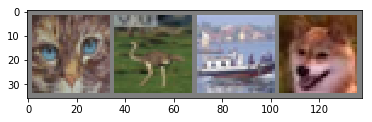

In [323]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [324]:
conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
fc1 = nn.Linear(16 * 5 * 5, 120)
fc2 = nn.Linear(120, 84)
fc3 = nn.Linear(84, 10)

In [325]:
for i, data in enumerate(trainloader, 0):
    if i == 0:
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

In [326]:
inputs.shape

torch.Size([4, 3, 32, 32])

In [327]:
labels.shape

torch.Size([4])

In [328]:
x = pool(relu(conv1(inputs)))
x.shape

torch.Size([4, 6, 14, 14])

In [329]:
x = pool(relu(conv2(x)))
x.shape

torch.Size([4, 16, 5, 5])

In [330]:
x = x.view(-1, 16 * 5 * 5)
x.shape

torch.Size([4, 400])

In [331]:
x = relu(fc1(x))
x.shape

torch.Size([4, 120])

In [332]:
x = relu(fc2(x))
x.shape

torch.Size([4, 84])

In [333]:
x = fc3(x)
x.shape

torch.Size([4, 10])

In [334]:
x

Variable containing:
-0.1513  0.1104 -0.0236  0.0578  0.0188 -0.0031 -0.0678  0.1060 -0.0863  0.0037
-0.1321  0.1275 -0.0187  0.0455  0.0229 -0.0194 -0.0712  0.1123 -0.0968  0.0081
-0.1371  0.1151 -0.0212  0.0474  0.0108 -0.0122 -0.0686  0.1009 -0.0915 -0.0002
-0.1452  0.0996 -0.0163  0.0606  0.0007 -0.0176 -0.0611  0.1141 -0.0867  0.0069
[torch.FloatTensor of size 4x10]

In [335]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [336]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [337]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.180
[1,  4000] loss: 1.838
[1,  6000] loss: 1.657
[1,  8000] loss: 1.565
[1, 10000] loss: 1.500
[1, 12000] loss: 1.444
[2,  2000] loss: 1.373
[2,  4000] loss: 1.344
[2,  6000] loss: 1.328
[2,  8000] loss: 1.298
[2, 10000] loss: 1.268
[2, 12000] loss: 1.267
Finished Training


GroundTruth:    cat  ship  ship plane


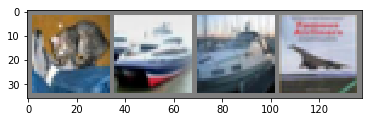

In [338]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [339]:
outputs = net(Variable(images))

In [346]:
outputs

Variable containing:
-1.3676 -1.6308  1.0254  2.2335  0.2039  0.8661  1.6625 -1.5441 -0.7600 -2.1813
 4.5462  5.1237 -2.2692 -3.0711 -3.1795 -4.2643 -3.4351 -3.5639  5.7036  3.9655
 0.8784  2.2094 -0.1007 -0.8418 -1.6790 -1.2544 -1.0244 -1.0475  1.0310  2.3136
 2.6041  1.3270 -0.5465 -1.1287 -0.9006 -2.3805 -1.9304 -1.3570  2.3806  1.4958
[torch.FloatTensor of size 4x10]

In [341]:
labels


 3
 8
 8
 0
[torch.LongTensor of size 4]

In [355]:
torch.max(outputs.data, dim=1)

(
  2.2335
  5.7036
  2.3136
  2.6041
 [torch.FloatTensor of size 4], 
  3
  8
  9
  0
 [torch.LongTensor of size 4])

In [10]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat plane plane plane


In [11]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 43 %
Accuracy of   car : 64 %
Accuracy of  bird : 34 %
Accuracy of   cat : 32 %
Accuracy of  deer : 51 %
Accuracy of   dog : 72 %
Accuracy of  frog : 63 %
Accuracy of horse : 46 %
Accuracy of  ship : 58 %
Accuracy of truck : 71 %


# 1D CNN prototype

References:
- http://pytorch.org/docs/master/nn.html
- https://gist.github.com/spro/c87cc706625b8a54e604fb1024106556
- 1d Convolution: http://pytorch.org/docs/0.3.0/nn.html?highlight=conv1d#convolution-layers
- ReLU: http://pytorch.org/docs/0.3.0/nn.html?highlight=relu#torch.nn.ReLU
- View (reshape): http://pytorch.org/docs/master/tensors.html
- 1d Max pooling: http://pytorch.org/docs/master/nn.html?highlight=maxpool1d#torch.nn.MaxPool1d
- Linear layer: http://pytorch.org/docs/master/nn.html#linear-layers

In [2]:
from torch.nn import MaxPool1d, AvgPool1d
from torch.nn import ReLU
from torch.nn import Linear

In [3]:
inputs = Variable(torch.rand(5, 4, 100))
inputs.shape

# inputs = torch.Tensor(torch.rand(5, 4, 100))
# inputs.shape

torch.Size([5, 4, 100])

In [4]:
inputs

Variable containing:
( 0 ,.,.) = 
  0.4052  0.3891  0.0595  ...   0.7704  0.2031  0.6000
  0.1595  0.7302  0.9270  ...   0.9970  0.1295  0.7430
  0.3919  0.6172  0.2541  ...   0.5408  0.4942  0.7272
  0.2414  0.4815  0.4943  ...   0.4726  0.1666  0.1264

( 1 ,.,.) = 
  0.5006  0.6414  0.3251  ...   0.0030  0.7925  0.0999
  0.0713  0.9831  0.5351  ...   0.9610  0.7914  0.4834
  0.4649  0.3105  0.7072  ...   0.0751  0.0055  0.6873
  0.6699  0.7237  0.2577  ...   0.2100  0.4121  0.1496

( 2 ,.,.) = 
  0.5644  0.0582  0.3421  ...   0.9719  0.3491  0.2298
  0.7473  0.2829  0.1286  ...   0.3658  0.2576  0.4517
  0.6130  0.0127  0.5833  ...   0.4853  0.7564  0.7083
  0.8588  0.5747  0.5069  ...   0.0470  0.9705  0.2633

( 3 ,.,.) = 
  0.9086  0.2505  0.5146  ...   0.8025  0.8221  0.8253
  0.7279  0.4602  0.5036  ...   0.0276  0.6526  0.6533
  0.5321  0.1867  0.0803  ...   0.5093  0.1271  0.7964
  0.5767  0.8344  0.4871  ...   0.4534  0.1838  0.2759

( 4 ,.,.) = 
  0.0783  0.1259  0.7104  ... 

In [5]:
targets = Variable(torch.from_numpy(np.array(np.random.randint(low=0, high=2, size=(5,)))))
# targets = targets.type(torch.FloatTensor)
targets
# torch.Tensor(targets)
targets.shape

# targets = torch.Tensor(torch.from_numpy(np.array(np.random.randint(low=0, high=2, size=(5,)))))
# targets.shape

Variable containing:
 0
 1
 1
 1
 0
[torch.LongTensor of size 5]

torch.Size([5])

In [367]:
conv1 = nn.Conv1d(in_channels=4,
                out_channels=64,
                kernel_size=16,
                stride=1,
                padding=0,
                dilation=1,
                groups=4, # needs to be same as in_channels here
                bias=True)



conv2 = nn.Conv1d(in_channels=64,
                out_channels=1024,
                kernel_size=16,
                stride=1,
                padding=0,
                dilation=1,
                groups=64, # needs to be same as in_channels here
                bias=True)

relu = ReLU()

maxpool = MaxPool1d(kernel_size=3, stride=1)

linear1 = Linear(in_features=1024*66, out_features=1024, bias=True)
linear2 = Linear(in_features=1024, out_features=512, bias=True)
linear3 = Linear(in_features=512, out_features=128, bias=True)
linear4 = Linear(in_features=128, out_features=2, bias=True)

In [368]:
outputs = maxpool(relu(conv1(inputs)))
outputs.shape

torch.Size([5, 64, 83])

In [369]:
outputs = maxpool(relu(conv2(outputs)))
outputs.shape

torch.Size([5, 1024, 66])

In [370]:
outputs = outputs.view(-1, 1024*66)
outputs.shape

torch.Size([5, 67584])

In [371]:
outputs = relu(linear1(outputs))
outputs.shape

torch.Size([5, 1024])

In [372]:
outputs = relu(linear2(outputs))
outputs.shape

torch.Size([5, 512])

In [373]:
outputs = relu(linear3(outputs))
outputs.shape

torch.Size([5, 128])

In [374]:
outputs = linear4(outputs)
outputs.shape

torch.Size([5, 2])

In [375]:
outputs

Variable containing:
1.00000e-02 *
 -6.1614 -1.8447
 -6.1611 -1.8382
 -6.1500 -1.8505
 -6.1740 -1.8472
 -6.1603 -1.8587
[torch.FloatTensor of size 5x2]

In [6]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=4,
                               out_channels=64, # here out_channels = in_channels*kernel_size for depthwise convolution
                               kernel_size=16,
                               stride=1,
                               padding=0,
                               dilation=1,
                               groups=4, # needs to be same as in_channels here
                               bias=True)
        
        
        self.conv2 = nn.Conv1d(in_channels=64,
                               out_channels=1024, # here out_channels = in_channels*kernel_size for depthwise convolution
                               kernel_size=16,
                               stride=1,
                               padding=0,
                               dilation=1,
                               groups=64, # needs to be same as in_channels here
                               bias=True)

        
        self.pool = nn.MaxPool1d(kernel_size=3, stride=1)
        self.fc1 = nn.Linear(in_features=1024*66, out_features=1024, bias=True)
        self.fc2 = nn.Linear(in_features=1024, out_features=512, bias=True)
        self.fc3 = nn.Linear(in_features=512, out_features=128, bias=True)
        self.fc4 = nn.Linear(in_features=128, out_features=2, bias=True)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 1024*66)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net()

In [377]:
net(inputs)

Variable containing:
1.00000e-02 *
  8.2300 -2.1948
  8.2376 -2.1607
  8.2360 -2.1789
  8.2408 -2.1620
  8.2282 -2.1861
[torch.FloatTensor of size 5x2]

In [380]:
# criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(net.parameters(), lr=1e-4)

criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [381]:
for t in range(50):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = net(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if t % 10 == 0:
        print(t, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 0.7048783302307129
10 0.7048360109329224
20 0.7047935724258423
30 0.704751193523407
40 0.704708993434906


In [382]:
net(inputs)

Variable containing:
1.00000e-02 *
  8.1461 -2.1138
  8.1532 -2.0792
  8.1513 -2.0971
  8.1563 -2.0805
  8.1444 -2.1052
[torch.FloatTensor of size 5x2]

In [386]:
_, predicted = torch.max(net(inputs).data, 1)

In [407]:
metrics = pd.DataFrame(
    list(zip(
    ['precision', 'recall', 'fscore', 'support'],
    precision_recall_fscore_support(np.array(predicted), np.array(targets.data))
)),
    columns=['metric', 'scores']
)

metrics['scores_0_class'] = metrics['scores'].apply(lambda x: x[0])
metrics['scores_1_class'] = metrics['scores'].apply(lambda x: x[1])

metrics.drop('scores', axis=1, inplace=True)

print('accuracy: ', accuracy_score(np.array(predicted), np.array(targets.data)))
metrics

accuracy:  0.4


/Users/eric.bunch/anaconda2/envs/pytorch/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


,metric,scores_0_class,scores_1_class
0,precision,1.000000,0.0
1,recall,0.400000,0.0
2,fscore,0.571429,0.0
3,support,5.000000,0.0


# Sample features from seizure data set

In [7]:
seizure_features = pd.read_csv('/Users/eric.bunch/seizure_homology_cnn_features_sample_12_27.csv')

In [8]:
seizure_features.head()
seizure_features.shape

,second,betti,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35000000000000003,0.36,0.37,0.38,0.39,0.4,0.41000000000000003,0.42,0.43,0.44,0.45,0.46,0.47000000000000003,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.5700000000000001,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.6900000000000001,0.7000000000000001,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.8200000000000001,0.8300000000000001,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.9400000000000001,0.9500000000000001,0.96,0.97,0.98,0.99,channel,seizure_flag
0,9,betti_0,8.0,8.0,8.0,8.0,8.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,F8-CS2,0
1,9,betti_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F8-CS2,0
2,9,betti_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F8-CS2,0
3,10,betti_0,8.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,F8-CS2,0
4,10,betti_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F8-CS2,0


(258552, 104)

In [158]:
seizure_inputs = seizure_features.drop(
    ['betti', 'channel', 'seizure_flag'],
    axis=1
).groupby('second', as_index=True).apply(lambda x: x.drop('second', axis=1).values)

seizure_inputs = np.array([np.array(seizure_inputs[index]) for index in seizure_inputs.index])

In [159]:
seizure_inputs.shape

(3591, 72, 100)

In [161]:
seizure_in_torch = Variable(torch.Tensor(seizure_inputs))

In [162]:
seizure_in_torch.shape

torch.Size([3591, 72, 100])

In [170]:
seizure_target = seizure_features[['second', 'seizure_flag']].drop_duplicates()['seizure_flag'].values

In [236]:
pd.Series(seizure_target).value_counts()[0] / pd.Series(seizure_target).count()

0.93455861876914503

In [172]:
seizure_target_torch = Variable(torch.Tensor(seizure_target))

In [222]:
seizure_target_torch = seizure_target_torch.type(torch.LongTensor)

In [223]:
seizure_target_torch.shape

torch.Size([3591])

### Redefine network for dimensions of data

In [200]:
conv1 = nn.Conv1d(in_channels=72,
                       out_channels=288, # here out_channels = in_channels*kernel_size for depthwise convolution
                       kernel_size=4,
                       stride=1,
                       padding=0,
                       dilation=1,
                       groups=72, # needs to be same as in_channels here
                       bias=True)


conv2 = nn.Conv1d(in_channels=288,  # needs to be same as out_channels of previous convolution layer
                       out_channels=1152, # here out_channels = in_channels*kernel_size for depthwise convolution
                       kernel_size=4,
                       stride=1,
                       padding=0,
                       dilation=1,
                       groups=288, # needs to be same as in_channels here
                       bias=True)

relu = ReLU()

pool = nn.MaxPool1d(kernel_size=3, stride=1)

fc1 = nn.Linear(in_features=1152*90, out_features=1000, bias=True)
fc2 = nn.Linear(in_features=1000, out_features=500, bias=True)
fc3 = nn.Linear(in_features=500, out_features=100, bias=True)
fc4 = nn.Linear(in_features=100, out_features=2, bias=True)

In [193]:
seiz_outputs = pool(relu(conv1(seizure_in_torch)))

In [194]:
seiz_outputs.shape

torch.Size([3591, 288, 95])

In [195]:
seiz_outputs = pool(relu(conv2(seiz_outputs)))

In [196]:
seiz_outputs.shape

torch.Size([3591, 1152, 90])

In [198]:
seiz_outputs = seiz_outputs.view(-1, 1152*90)

In [199]:
seiz_outputs.shape

torch.Size([3591, 103680])

In [201]:
seiz_outputs = relu(fc1(seiz_outputs))

In [202]:
seiz_outputs.shape

torch.Size([3591, 1000])

In [203]:
seiz_outputs = relu(fc2(seiz_outputs))

In [205]:
seiz_outputs.shape

torch.Size([3591, 500])

In [206]:
seiz_outputs = relu(fc3(seiz_outputs))

In [207]:
seiz_outputs.shape

torch.Size([3591, 100])

In [208]:
seiz_outputs = fc4(seiz_outputs)

In [209]:
seiz_outputs.shape

torch.Size([3591, 2])

In [210]:
seiz_outputs

Variable containing:
1.00000e-02 *
 6.7635 -3.7463
 6.7631 -3.7466
 6.7631 -3.7465
       ⋮        
 6.7620 -3.7465
 6.7628 -3.7467
 6.7618 -3.7455
[torch.FloatTensor of size 3591x2]

In [212]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class SeizNet(nn.Module):
    def __init__(self):
        super(SeizNet, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=72,
                               out_channels=288, # here out_channels = in_channels*kernel_size for depthwise convolution
                               kernel_size=4,
                               stride=1,
                               padding=0,
                               dilation=1,
                               groups=72, # needs to be same as in_channels here
                               bias=True)
        
        
        self.conv2 = nn.Conv1d(in_channels=288,  # needs to be same as out_channels of previous convolution layer
                               out_channels=1152, # here out_channels = in_channels*kernel_size for depthwise convolution
                               kernel_size=4,
                               stride=1,
                               padding=0,
                               dilation=1,
                               groups=288, # needs to be same as in_channels here
                               bias=True)

        
        self.pool = nn.MaxPool1d(kernel_size=3, stride=1)
        self.fc1 = nn.Linear(in_features=1152*90, out_features=1000, bias=True)
        self.fc2 = nn.Linear(in_features=1000, out_features=500, bias=True)
        self.fc3 = nn.Linear(in_features=500, out_features=100, bias=True)
        self.fc4 = nn.Linear(in_features=100, out_features=2, bias=True)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 1152*90)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


seiz_net = SeizNet()

In [224]:
# criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(net.parameters(), lr=1e-4)

criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [225]:
for t in range(10):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = seiz_net(seizure_in_torch)

    # Compute and print loss
    loss = criterion(y_pred, seizure_target_torch)
    print(t, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 0.6903648376464844
1 0.6903648376464844
2 0.6903648376464844
3 0.6903648376464844
4 0.6903648376464844
5 0.6903648376464844
6 0.6903648376464844
7 0.6903648376464844
8 0.6903648376464844
9 0.6903648376464844


In [226]:
_, seiz_predicted = torch.max(seiz_net(seizure_in_torch).data, 1)

In [227]:
metrics = pd.DataFrame(
    list(zip(
    ['precision', 'recall', 'fscore', 'support'],
    precision_recall_fscore_support(np.array(seiz_predicted), np.array(seizure_target_torch.data))
)),
    columns=['metric', 'scores']
)

metrics['scores_0_class'] = metrics['scores'].apply(lambda x: x[0])
metrics['scores_1_class'] = metrics['scores'].apply(lambda x: x[1])

metrics.drop('scores', axis=1, inplace=True)

print('accuracy: ', accuracy_score(np.array(seiz_predicted), np.array(seizure_target_torch.data)))
metrics

accuracy:  0.934558618769


/Users/eric.bunch/anaconda2/envs/pytorch/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


,metric,scores_0_class,scores_1_class
0,precision,1.000000,0.0
1,recall,0.934559,0.0
2,fscore,0.966172,0.0
3,support,3591.000000,0.0
